## Gradiente descendente, ALgoritmo de optimizacion para ML

Se ajustan los parametros poco a poco, con el objetivo de llegar a minizar los más la posible la funcion de error logrando clasificar con el menor error posible   
El gradiente es la direccion y magnitud con que se ajustan los parametros. El gradiente se calcula usando derivadas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sympy as sym # permite hacer derivadas parciales y derivadas agilmente 

In [2]:
## variable independiente
experiencia  = np.array([[5],[6],[13]])

## Variable objetivo
salario  = np.array([6.85, 16.83, 26.84])

In [3]:
## Modelo lineal creado con el método de minimos cuadrados
modelo = LinearRegression().fit(experiencia.reshape(3, -1), salario)

Interseccion con eje Y (b): %0.2f 0.0
Pendiente con eje Y (m): %0.2f [2.105]
Suma de cuadrados de los residuos (RSS): %0.2f 31.421249999999997


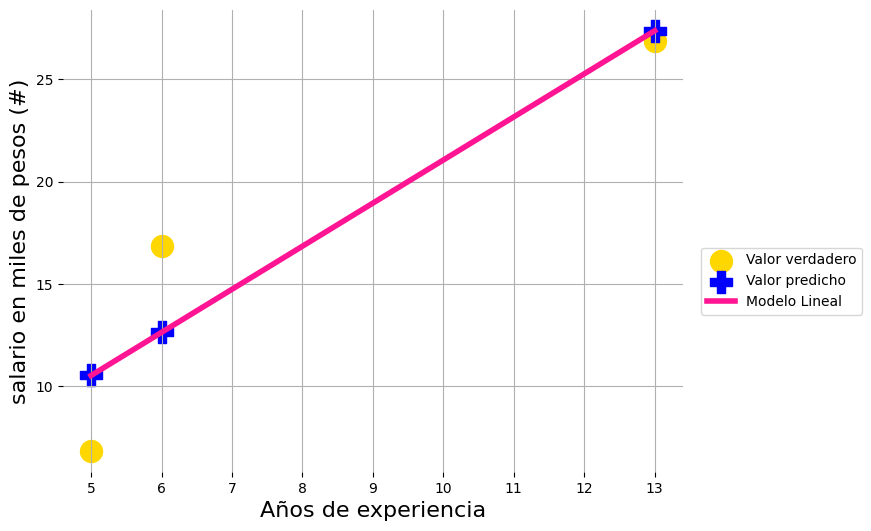

In [4]:
## Visualizacion de datos y modelo

print('Interseccion con eje Y (b): %0.2f', modelo.intercept_)
print('Pendiente con eje Y (m): %0.2f', modelo.coef_)
## Errores del modelo respecto a los datos, se lo evela al cuadrado
print('Suma de cuadrados de los residuos (RSS): %0.2f', ((salario-modelo.predict(experiencia))**2).sum())

plt.figure(figsize=(8,6))
plt.scatter(experiencia, salario, color='gold', s=250, marker='o', label='Valor verdadero')
plt.scatter(experiencia, modelo.predict(experiencia), color='blue', s=250, marker='P', label='Valor predicho')

plt.plot(experiencia, modelo.predict(experiencia), linewidth=4, color='deeppink', label= 'Modelo Lineal')

experiencia = experiencia.reshape(3)

plt.ylabel('salario en miles de pesos (#)', size = 16)
plt.xlabel('Años de experiencia', size = 16)
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.box(False)
plt.show()

### Diferentes Modelos con diferentes pendiente 


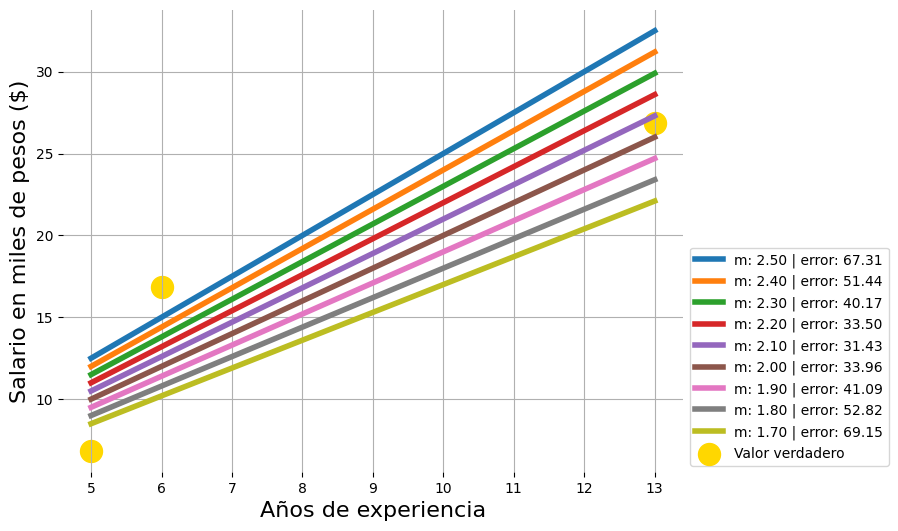

In [7]:
 ## Creacion de multiples pendiente para exploracion

pendientes = np.arange(2.5,1.6,-0.1)

## Vector para almancenar el error de los diferentes modelos 
errores = np.array([])

## Visualizacion de modelos
plt.figure(figsize=(8,6))

for pendiente in pendientes:
    ## Error del modelo (suma de cuadrados de los residuos)
    error =  ((pendiente*experiencia -salario)**2).sum()

    ## Visualizacion de un modelo para una pendiente dada
    plt.plot(experiencia, pendiente*experiencia, linewidth=4, label='m: %0.2f | error: %0.2f' % (pendiente, error))

    errores = np.append(errores, error)

plt.scatter(experiencia, salario, color = 'gold', s=250, marker='o', label='Valor verdadero')

plt.ylabel('Salario en miles de pesos ($)', size=16)
plt.xlabel('Años de experiencia', size =16)
plt.legend(bbox_to_anchor = (1, 0.5))
plt.grid()
plt.box(False)
plt.show()

### __Visualizacion de los Errores (RSS)__

Pendiente 2.1 error más bajo del modelo    
se tiene la funcion de error graficada, brinda informacion del valor del error minimo en la pendiente en el modelo de Regresion Lineal    

Como puedo hacerlo en programacion automaticamente (derivadas)    
La derivada es una razon de cambio: que tanto cambia una variable en funcion de otra, en este caso, que tanto cambia el error con respecto a la pendiente    

* Primero se prepara la funcion de error y se saca la derivada obteniendo la funcion de cambio para el error en funcion de la pendiente. 


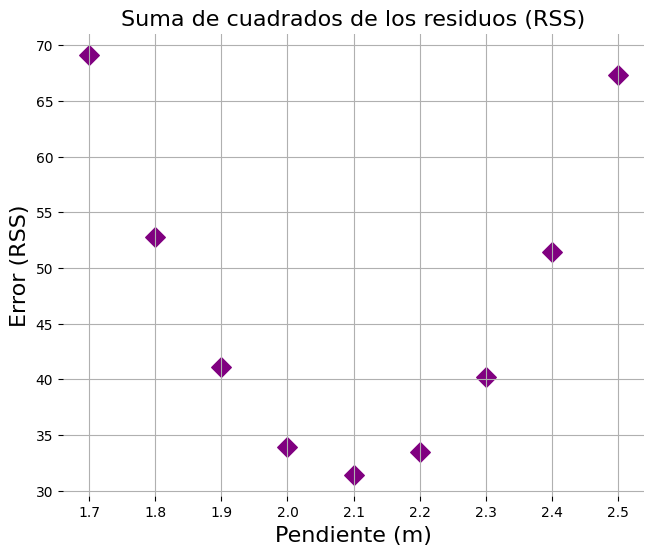

In [9]:
plt.figure(figsize=(7.5, 6))
plt.title('Suma de cuadrados de los residuos (RSS)', size=16)
plt.ylabel('Error (RSS)', size= 16)
plt.xlabel('Pendiente (m)', size= 16)
plt.scatter(pendientes, errores, color='purple', marker='D', s=99)
plt.grid()
plt.box(False)
plt.show()

#### Funcion de error a ser minimizada 

#### __Suma de los cuadrados de los residuos RSS__

$$ RSS(y, y^i) = Sumatoria(y-y^i)**2 $$

In [10]:
## Persona 1 : (6.85, 5) persona2: (16.83, 6) persona3: (26.84, 13)

m = sym.Symbol('m') # variable que es un simbolo
## Funcion de error
error = (6.85 - m*5)**2 + (16.83 - m*6)**2 + (26.84 - m*13)**2
        ## errror person1 +error persona2...

## Derivada de la funcion de error (uso de sympy)
derivada_fun_error = sym.diff(error, m)

for pendiente in pendientes:
    print(derivada_fun_error, 'Evaluacion %0.2f' %derivada_fun_error.evalf(subs={m:pendiente}))


460.0*m - 968.3 Evaluacion 181.70
460.0*m - 968.3 Evaluacion 135.70
460.0*m - 968.3 Evaluacion 89.70
460.0*m - 968.3 Evaluacion 43.70
460.0*m - 968.3 Evaluacion -2.30
460.0*m - 968.3 Evaluacion -48.30
460.0*m - 968.3 Evaluacion -94.30
460.0*m - 968.3 Evaluacion -140.30
460.0*m - 968.3 Evaluacion -186.30


Se evalua el error para una pendiente dada


### __Visualizacion Derivada de la funcion de Error__

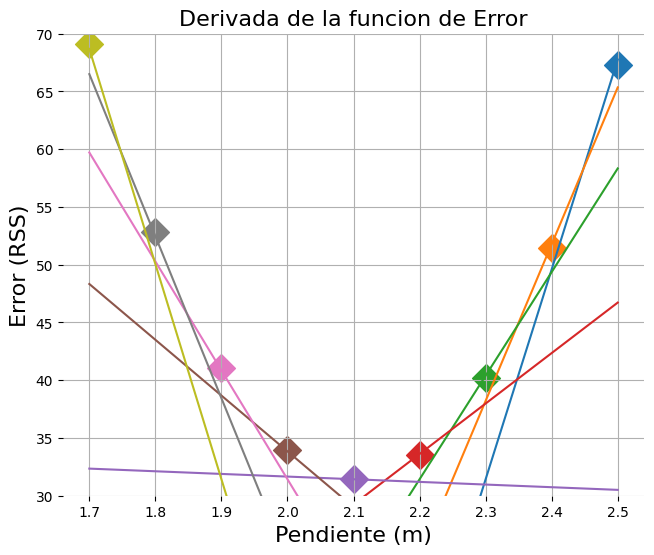

In [12]:
plt.figure(figsize=(7.5,6))

for i in range(0, len(errores), 1):
    ## Error de un modelo dado
    plt.scatter(pendientes[i], errores[i], label='%0.2f' % derivada_fun_error.evalf(subs={m: pendientes[i]}), marker='D', s=200)
## Evalucion de la derivada para un error dado
    pendiente = derivada_fun_error.evalf(subs={m: pendientes[i]})

    plt.plot(np.array([1.7,2.5]),
                np.array([1.7,2.5])*pendiente + pendiente*(-2.3+i*0.05) + errores.min())
plt.title('Derivada de la funcion de Error', size= 16)
plt.ylabel('Error (RSS)', size=16)
plt.xlabel('Pendiente (m)', size=16)
plt.ylim(30,70)
plt.grid()
plt.box(False)
plt.show()

se grafica el gradiente 